<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Some-first-concepts" data-toc-modified-id="Some-first-concepts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Some first concepts</a></span><ul class="toc-item"><li><span><a href="#A-simple-plate-model-of-leaf-optical-properties" data-toc-modified-id="A-simple-plate-model-of-leaf-optical-properties-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>A simple plate model of leaf optical properties</a></span><ul class="toc-item"><li><span><a href="#An-improvement..." data-toc-modified-id="An-improvement...-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>An improvement...</a></span></li></ul></li><li><span><a href="#The-PROSPECT-leaf-optical-properties-model" data-toc-modified-id="The-PROSPECT-leaf-optical-properties-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The PROSPECT leaf optical properties model</a></span><ul class="toc-item"><li><span><a href="#Exploring-the-input-vs-output-parameters-space-of-PROSPECT" data-toc-modified-id="Exploring-the-input-vs-output-parameters-space-of-PROSPECT-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Exploring the input vs output parameters space of PROSPECT</a></span></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Exercises</a></span></li></ul></li></ul></li><li><span><a href="#Exploring-the-parameter-$N$" data-toc-modified-id="Exploring-the-parameter-$N$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploring the parameter $N$</a></span></li><li><span><a href="#Vegetation-indices" data-toc-modified-id="Vegetation-indices-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Vegetation indices</a></span><ul class="toc-item"><li><span><a href="#Red-edge-model-exploration" data-toc-modified-id="Red-edge-model-exploration-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Red edge model exploration</a></span></li></ul></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

from prosail_functions import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


Bad key keymap.all_axes in file matplotlibrc, line 398 ('keymap.all_axes : a                 # enable all axes')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution


<div style="float:right">
    <table>
    <tr>
        <td> <img src="figs/kcl_logo.png" alt="Drawing" style="width:54px;height:40px;"/> 
        <td> <img src="figs/nceo_logo.png" alt="Drawing" style="width:200px;height:40px;"/> 
        <td> <img src="figs/multiply_logo.png" alt="Drawing" style="width:40px;height:40px;"/>
    </tr>
    </table>
</div>

# Optical properties of leaves

**Author:** Jose Gómez-Dans (NCEO & UCL)  `jose.gomez-dans@kcl.ac.uk`

**J Gómez-Dans (NCEO & UCL)**

In order to understand the reflectance signal acquired by a passive sensor that captures the sunlight scattered by a canopy, we need to understand how the different pigments that contribute to reflectance and transmittance of leaves, as well as understanding the geometrical disposition of leaves within the canopy. We will first look at an individual leaf, and try to come up with a simple model of how reflectance and transmittance can be calculated.

We will focus on the widely used PROSPECT model by [Jacquemoud *et al*, 1990](http://www2.geog.ucl.ac.uk/~mdisney/teaching/teachingNEW/GEOGG141/papers/jacqemoud_baret_prospect.pdf). Although other models do exist, PROSPECT is straightforward and works reasonably well.

## Some first concepts

As a flux of photons hits an object, the photons can either be absorbed by the object ($A$), scattered away ($R$), or be transmitted ($T$) by the object. Conservation laws imply that the sum of absorptance, reflectance and transmittance is one:
$$
A + R + T = 1.
$$
Note that the value of these three magnitudes varies with wavelength ($\lambda$). Understanding the processes that give rise to these changes over the spectrum allows us to infer something about the leaf biochemical and structural composition.
![Internal leaf structure diagram](./figs/leaf++struture++cuticle+mesophyll+stoma.gif)

We further consider that reflectance has a surface ($R_s$) component and a component due to the multiple scattering that takes place within the leaf, $R_d$. The first component is due to the air-leaf interface and the waxy leaf surface, and is fairly important. This surface reflectance is controlled thus by the surface properties and leaf surface microtopography. It has been observed that this component is far from *Lambertian* (isotropic), exhibiting a strong *directional effect*. 

$R_d$ is mostly a consequence of air-cell wall interfaces. As a photon beam enters the leaf, it will traverse it suffering reflectance every time it encounters a discontinuity, following a unique pattern within the leaf, and either being reflected "upwards" through the leaf surface or "downwards" through the opposite surface of the leaf. These interactions are assumed to provide a reflected and transmitted fluxes that are broadly non-directional (Lambertian). The combination of $R_s$ and $R_d$ result in the observed directional and Lambertian properties of the leaf BRDF (bi-hemispherical reflectance distribution function)

The diffuse term thus is the result of photons traversing the leaf and interacting with different components of the mesophyll, and thus opens the possibiity to learn about the internal composition and structure of leaves by looking at how light is scattered by them.

We define the optical domain to lie between 400 and 2500$nm$. The following plot shows the spectral reflectance and transmittance from a clover leaf from the LOPEX'93 database:

![Clover reflectance and Transmittance](./figs/LOPEX_clover_spectrum.png)

In the visible region (400-700nm), there is a strong absorption of radiation by green leaves (note the peak in the green region, around 550nm). If chlorophyll concentration is low, absorption in this region is lower, and therefore, reflectance increases. In the NIR plateau (700-1100nm), absorption is controlled by cellulose and lignine, but also by the multiple scattering within the leaf, and thus, to the internal structure and interfaces of refraction within leaf layers. Towards the SWIR region, we see relatively strong absorption due to water, with some very important absorption peaks around 1450, 1950 and 2500 nm. 

### A simple plate model of leaf optical properties

A simple approximation to a monocot leaf can be a plate model, where we see the leaf as a layer with a particular refraction index $n_2$. The model can be depicted as
![Single plate model of a leaf](./figs/single_plate_model.png)

An incoming beam that enters the layer is partially reflected, partially transmitted and partially absorbed. The total reflectance can be calculated following the work of Airy, and after calculating an infinite summation yields

$$
R = r_{12}+\frac{t_{12}t_{21}r_{21}\tau^2}{1-r_{21}^2\tau^2},
$$

where $r_{12}$ and $t_{12}$ are the average reflectivity and transmissivity for medium 1 into medium 2 (air to leaf) (similar arguments for $r_{21}$ and $t_{21}$. $\tau$ is the fraction of light transmitted through the medium. A similar expression can be derived from the leaf transmissivity, $T$ (not shown). $r_{12}$ is calculated from Fresnel's equations for an incidence angle $\theta$ and a refractive index $n$. We note that $r_{12} = 1- t_{12}$, $r_{21} = 1- t_{21}$ and that $t_{21}=t_{12}/n$. $\tau$ is related to the absorption coefficient of the plate, $k$, as is calculated through Beer's law. This means that in order to calculate the leaf transmittance and reflectance with this simple model, we only need the refraction index $n$ and the absorption coefficient $k$.

#### An improvement...

While the model presented above was successfully tested in a number of simple leaves and found to work reasonably well, it fails to account for more general leaves that exhibit a complex internal structure (such as senescent leaves, dicots...). To this end, the single plate model was extended to having a *stack* of $N$ plates and $N-1$ air layers between them, as shown below.


![Multilayer plate model](./figs/Fig5.png)


The solution to this new model was due to Stokes, and one finds that $T(N)$ and $R(N)$, respectively the transmittance and reflectance of a stack of $N$ layers is given by the following relationship

$$
\frac{R(N)}{b^{N}-b^{-N}}=\frac{T(N)}{a-a^{-1}}=\frac{1}{ab^{N}-a^{-1}b^{-N}},
$$

where

$$
\begin{align}
a &=\frac{1+R^{2}(1)-T^{2}(1) + \Delta}{2R(1)}\\
b &=\frac{1-R^{2}(1)+T^{2}(1) + \Delta}{2T(1)}\\
\Delta &= \sqrt { (T^{2}(1)-R^{2}(1)-1)-4R^{2}(1)}.
\end{align}
$$

Here, $T(1)$ and $R(1)$ are the properties of a single layer, which can be calculated with a knowledge of the refraction index of the layer and the per layer absorption coefficient $k$. The latter is a summation of the weighted absorptions of the different leaf pigments.


### The PROSPECT leaf optical properties model


The PROSPECT model implements a multi-layer concept, but assuming that the number of layers $N$ is a non-integer number. PROSPECT is able to reproduce measured leaf reflectance and transmittance spectra quite well, and has found a large user community, demonstrated by an important literature. In order to parameterise the model, the initial version of PROSPECT used as input parameters
* the number of layers $N$ (remember this can be a non-integer number), 
* the chlorophyll a+b concentration $[\mu gcm^{-2}]$ and  
* the equivalent water thickness $[cm]$. 

In essence, one parameter controls the leaf internal structure, and the other two control the leaf optical properties in the visible (chlorophyll) and NIR and SWIR (water) regions. 


Given that some compounds exhibit bonds that have absorption bands in the SWIR region (e.g. cellulose and lignin, proteins, ...), there was a concerted effort to add these contributions to the model, so in inversion studies, something about the carbon or nitrogen content of leaves could be inferred. However, the lack of a very speicific signature for these components, and the fact that water absorption is an important part of the signal in the same region, results in very limited capabilities to infer these concentrations from either reflectance or transmittance. In practice, to account for these effects, a specific absorption spectrum of dry matter was developed, adding a new input to the prospect model, dry matter content $[gcm^{-2}]$. Finally, the chlorophyll contribution was split into chlorophyll and carotenoids, and an additional "brown pigment" was added (unitless). These constituents account for most of the variation in leaf optical properties, and thus make PROSPECT a good parsimonious model to model leaf transmittance and reflectance. 

#### Exploring the input vs output parameters space of PROSPECT

The next section provides a hands-on exploration of how the choices in input parameters for PROSPECT affect the predictions of reflectance and transmittance. A first way to look at this is to look at the spectral sensitivityy of the outputs. To simplify things, we consider the *single scattering albedo*, the sumo f reflectance and transmittance, $\omega=\rho+\tau$. 

The following code allows you to set the PROSPECT model parameters and to look at the spectral first  derivatives of $\omega$ as a function of the parameter of interest around location $\vec{x}_{0}$, where $\vec{x}$ is a stack of PROSPECT parameters. In an equation:

$$
\vec{H}(\vec{x}_{0})=\frac{\partial \textrm{PROSPECT}}{\partial \vec{x}}\vert_{\vec{x}=\vec{x}_{0}}
$$

In [2]:
r = sensitivity_prospect()

interactive(children=(FloatSlider(value=1.8, description='leaf_n', max=3.0, min=1.0), FloatSlider(value=40.0, …

#### Exercises

In the light of the above plots (and note that you may need to push numbers around a bit to get some different effects!):

* What parameters have a clear spectral response?
* Where is the spectral response located?
* What parameters have a more "stable" spectral response?
* Are there any regions of the spectrum that are particularly crowded? What would the implication here be?
* Can you say something about the value of the derivatives? 

## Exploring the parameter $N$

The number of leaf layers $N$ is an important parameter that stands in for the structural complexity of the internal leaf structure. The aim of the next experiment is to see what effect $N$ has in the ratio of reflecance to transmittance of the leaves.

* Comment on the form of the relationships found. 
* Does the random variation of the other parameters seem to have much impact? 
* What is the form of the relationship you see? Does the form vary with $N$? If so, how? What is the general trend with varying $N$?

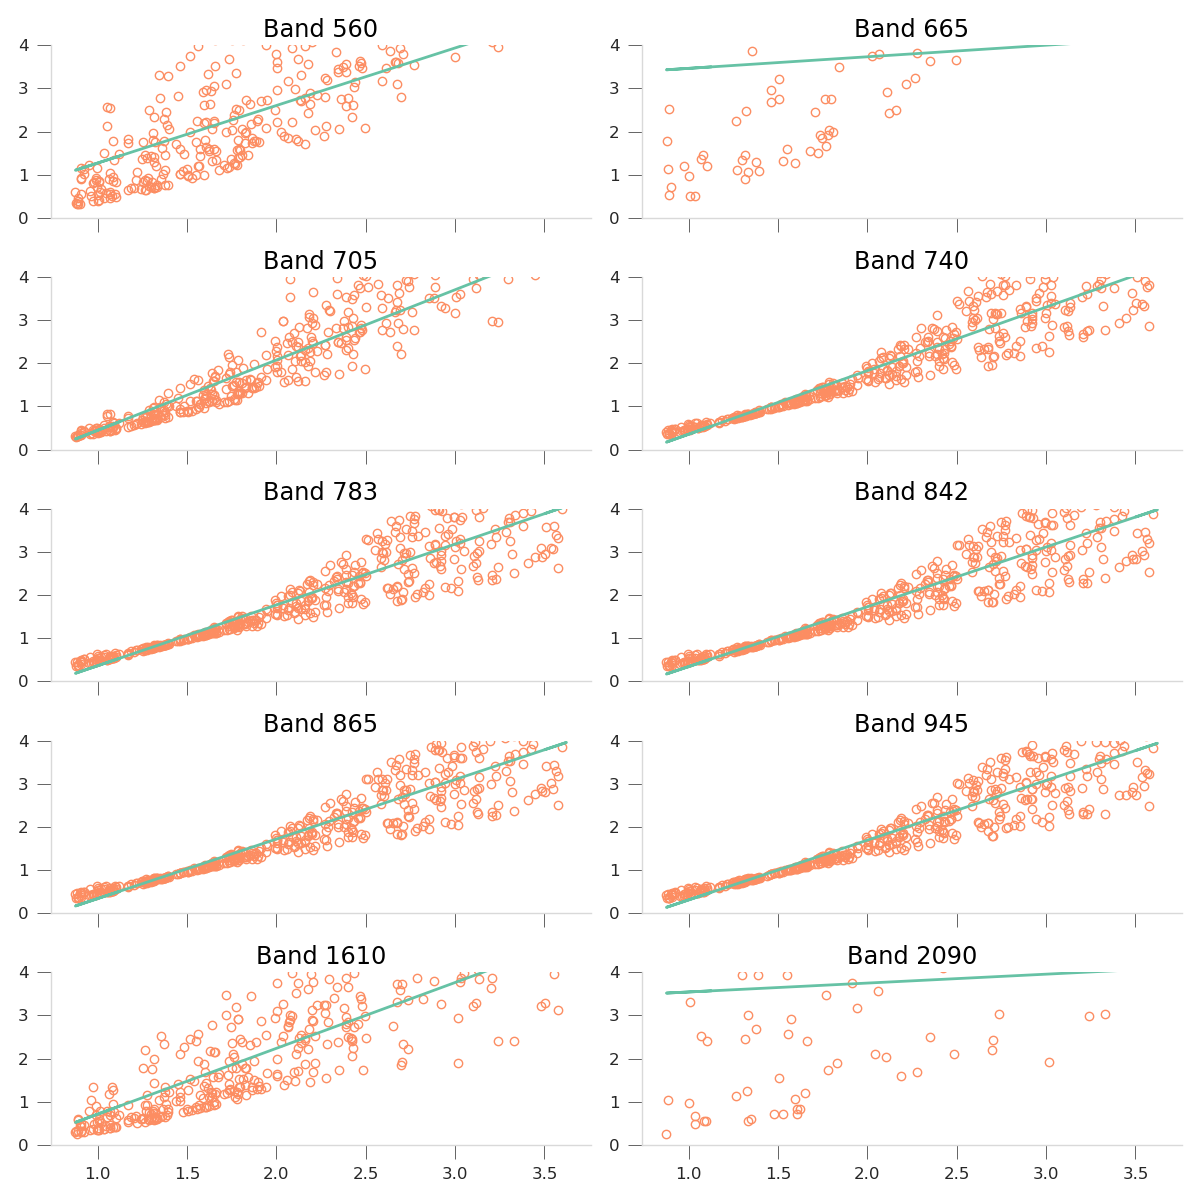

In [3]:
wv = np.arange(400, 2501)
xleafn, refl, trans = prospect_sensitivity_n(n_samples=50)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 12), sharex=True)
axs = axs.flatten()
regr = []
for i, band in enumerate([560, 665, 705, 740, 783, 842, 865, 945, 1610, 2090]):
    axs[i].plot(xleafn, np.mean(refl[:, wv == band]/trans[:, wv == band], axis=1),
                'o', markerfacecolor="none")
    y = np.clip(np.mean(refl[:, wv == band] /
                        trans[:, wv == band], axis=1), 0, 4)
    p = np.polyfit(xleafn, y, 1)
    axs[i].plot(xleafn, np.polyval(p, xleafn), '-')
    axs[i].set_title("Band %d" % band)
    axs[i].set_ylim(0, 4)
fig.tight_layout()

## Vegetation indices

Simple ratios of reflectance at different wavlenghts have been widely used to infer the properties of leaves and canopies. The goal of these indices is to maximise the sensitivity to a particular parameter of interest, while minimising the contribution of the other parameters. A typical form for these indices is a normalised vegetation index, e.g.

$$
VI = \frac{b_2 - b_1}{b_2 + b_1 }.
$$

The ``veg_index_playground`` function allows you to calculate an index like the one above over a sweep of a parameter of interest (e.g. $C_{ab}, C_{w}, \dots$), while randomly choosing the other parameters. The script allows you to select the centre wavelength for both bands 1 and 2, as well as the bandwidth (a band extends from $\lambda_c \pm \lambda_b$). It also allows you to calculate the index using either reflectance, transmittance or SSA
* Given your analysis of the sensitivity of PROSPECT, design VIs that maximise the impact of 
    * Chlorophyll
    * Leaf water
    * Dry matter
* Comment on the robustness of the relationship
* Consider reflectance, transmittance, single scattering albedo...
* What's the influence of spectral resolution? E.g. try to work out these indices for the typical 
spectral resolutions you find in e.g. Sentinel 2 or MODIS.

For example, if we were interested in $C_w$, we can see from above that there are some areas where $C_w$ has a strong effect on the reflectance. For example, around 1400 to 1600 nm. We can also see that its effect is quite small in the visible or NIR region. Selecting our response band to be 1610 nm (Sentinel 2 band 11), and the reference band to 865 nm (Sentinel 2 band 8), with a very narrow bandwidth (1nm), we can see what the response of the VI is. An ideal VI would provide an unique match from any VI value to the parameter of interest. 



In [4]:
_=veg_index_playground();


interactive(children=(Dropdown(description='mode', options=('ssa', 'refl', 'trans'), value='ssa'), Dropdown(de…


### Red edge model exploration

The leaf optical properties show a fast transition in the area known as the *red edge*, spectrally around 670-780 $nm$. In this transition region, chlorophyll goes from being strongly absorbing to the leaf internal structure being very reflective due to its internal structure. For high amounts of chlorophyll, the absorption feature in clorophyll around 680nm brings reflectance down, shifting the transition point between the chlorophyll absorption and the near infrared reflection to the right as a function of e.g. larger leaf chlorophyll concentrations. The shift of this transition zone has thus been related to "stress" on the leaves, but where is this "turning point"? One way to compress the data over this region is to fit an e.g. cubic model, and then finding where the turning point is. Remember that this turning point is given by the second derivative, $\partial f^{2}(\lambda)/\partial^2{\lambda}$. So if our model of reflectance is

$$
\rho = a + b\lambda + c\lambda^2 + d\lambda^3,
$$
then the second derivative is given by

$$
\frac{\partial^{2}\rho}{\partial^2\lambda}= 2c + 6d\lambda,
$$

and equating this to 0 yields $\lambda_{\textrm{red edge}} =-c/3d$. We have a function that fits this model to the data, and allows you to see how the location of $\lambda_{\textrm{red edge}}$ varies. 

The **``red_edge``** function allows you to explore this concept. The code implements the rationale introduced above. You will see how the spectra, and the location of the inflexion point in the plots. You will also see the relationship of $\lambda_{\textrm{red edge}}$ with chlorophyll concentration. 

* Based on the sensitivity analysis, try to explain what's happening in the red edge results that you are seeing.
* Is this method robust when we start considering slightly different spectral regions to fit the model to?
* What happens to high chlorophyll concentrations?

In [5]:
red_edge_playground()

interactive(children=(Dropdown(description='mode', index=1, options=('ssa', 'refl', 'trans'), value='refl'), D…

## Concluding remarks

This notebook has introduced some concepts of leaf optical modelling using the PROSPECT radiative transfer model. This model assumes a leaf can be modelled as a stack of layers that have a given reflectance and transmittance. The PROSPECT model has been calibrated predict these reflectances and transmittances as a function of some pigments concentrations, resulting that the model can be parameterised using the number of layers $N$ (a real number, often between ~1 and 3), and concentrations from some pigments such as chlorophyll a+b, carotenoids, etc. 

$N$ is a structural parameter. As such, it's effect is strong over the whole spectrum and it can broadly be seen as a mechanism controlling reflectance:transmittance, or a leaf structure parameter. This suggests that this parameter can be better understood if both reflectance and transmittance data are collected, rather than just reflectance. 

Different pigments have different spectral responses, from the highly localised (chlorophyll, carotenoids, anthoycyanins) to the more spectrally diffuse (water, dry matter).

The brown pigment is not a real pigment, but rather an "effective pigment" to simulate the effect of leaf senescence. 

Vegetation indices can sometimes we used to enhance some pigment response, but their efficacy is reduced when considering the whole possible parameter span. Similar comments can be said for curve fitting approaches.

It is worth noting that PROSPECT some extra parameters that control the effect of surface topography, as well as the air-to-leaf interface. These are often assumed, but might need to be exposed for some leaves.

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.